In [22]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Flatten, Dropout
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
#load cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
#normalize the pixel value bw 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
#one hot encode the labels (cifar 10 has 10 classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test,10)

In [5]:
#load VGG16 model pre trained on imagenet, without the top layers(fully connected layers)
#base_model = VGG16(weights = 'imagenet' , include_top = False, input_shape = (32,32,3))
base_model = VGG16(weights = 'imagenet' , include_top = False)

In [6]:
#freeze the layer of VGG16
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
#build the model
model = Sequential()

In [8]:
#define ip shape for sequential model
model.add(InputLayer(input_shape=(32,32,3)))

C:\Users\KH.EN.P2MCA24006\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [9]:
#add the vgg16 base model
model.add(base_model)

In [10]:
#flatten the op from vgg16's convolutional layers
model.add(Flatten())

In [11]:
#add a fully connected layer with 256 units and ReLU activaion
model.add(Dense(256, activation='relu'))

In [12]:
#add a dropout for regularization
model.add(Dropout(0.5))

In [13]:
#add op layer with 10 units (for 10 classes)  and softmax activation
model.add(Dense(10, activation='softmax'))

In [14]:
#compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:
#data augmentation to reduce overfitting
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [17]:
#fit the model using data augmentation
batch_size = 64
epochs =3
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

In [18]:
#train the model
history = model.fit(train_generator,
                    steps_per_epoch = x_train.shape[0] // batch_size,
                    epochs = epochs,
                    validation_data = (x_test, y_test))

Epoch 1/3


C:\Users\KH.EN.P2MCA24006\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 228s 289ms/step - accuracy: 0.2115 - loss: 2.1797 - val_accuracy: 0.4449 - val_loss: 1.6300
Epoch 2/3
  1/781 ━━━━━━━━━━━━━━━━━━━━ 3:15 251ms/step - accuracy: 0.3906 - loss: 1.7655

C:\Users\KH.EN.P2MCA24006\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.3906 - loss: 1.7655 - val_accuracy: 0.4458 - val_loss: 1.6294
Epoch 3/3
781/781 ━━━━━━━━━━━━━━━━━━━━ 238s 305ms/step - accuracy: 0.4018 - loss: 1.6939 - val_accuracy: 0.4882 - val_loss: 1.4868


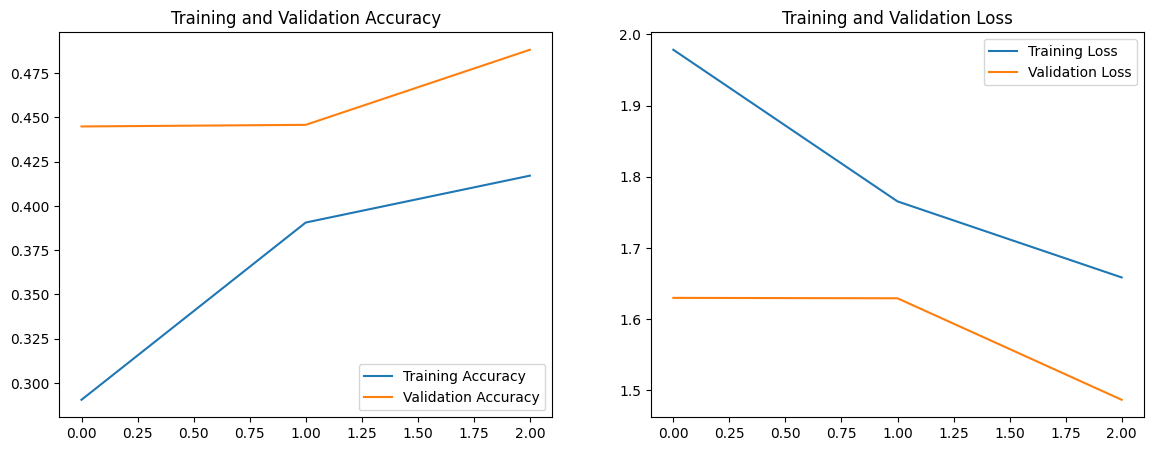

In [23]:
# Plot Training vs Validation Accuracy
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./boo.png')
plt.show() 